In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
Data=pd.read_csv('./music_genre.csv')

In [3]:
print(Data.shape)
Data.head()

(35491, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35491 entries, 0 to 35490
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       35486 non-null  float64
 1   artist_name       35486 non-null  object 
 2   track_name        35485 non-null  object 
 3   popularity        35485 non-null  float64
 4   acousticness      35485 non-null  float64
 5   danceability      35485 non-null  float64
 6   duration_ms       35485 non-null  float64
 7   energy            35485 non-null  float64
 8   instrumentalness  35485 non-null  float64
 9   key               35485 non-null  object 
 10  liveness          35485 non-null  float64
 11  loudness          35485 non-null  float64
 12  mode              35485 non-null  object 
 13  speechiness       35485 non-null  float64
 14  tempo             35485 non-null  object 
 15  obtained_date     35485 non-null  object 
 16  valence           35485 non-null  float6

### Les variables qualitatives

In [5]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

artist_name---------------------------------------['Röyksopp' 'Thievery Corporation' 'Dillon Francis' ... 'Matchbox Twenty'
 'The Fray' 'Passi']
track_name----------------------------------------["Röyksopp's Night Out" 'The Shining Path' 'Hurricane' ... 'Body Talks'
 "Let's Find An Out" 'Sweet Jane - Full Length 2015 Remastered']
key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
mode----------------------------------------------['Minor' 'Major' nan]
tempo---------------------------------------------['100.889' '115.00200000000001' '127.994' ... '110.999' '185.791'
 '191.946']
obtained_date-------------------------------------['4-Apr' '3-Apr' '5-Apr' '1-Apr' nan '0/4']
music_genre---------------------------------------['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock']


### Les valeurs manquantes

In [6]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(Data)

,Count Missing,Percent Missing
instance_id,5,0.014088
artist_name,5,0.014088
track_name,6,0.016906
popularity,6,0.016906
acousticness,6,0.016906
danceability,6,0.016906
duration_ms,6,0.016906
energy,6,0.016906
instrumentalness,6,0.016906
key,6,0.016906


<Axes: >

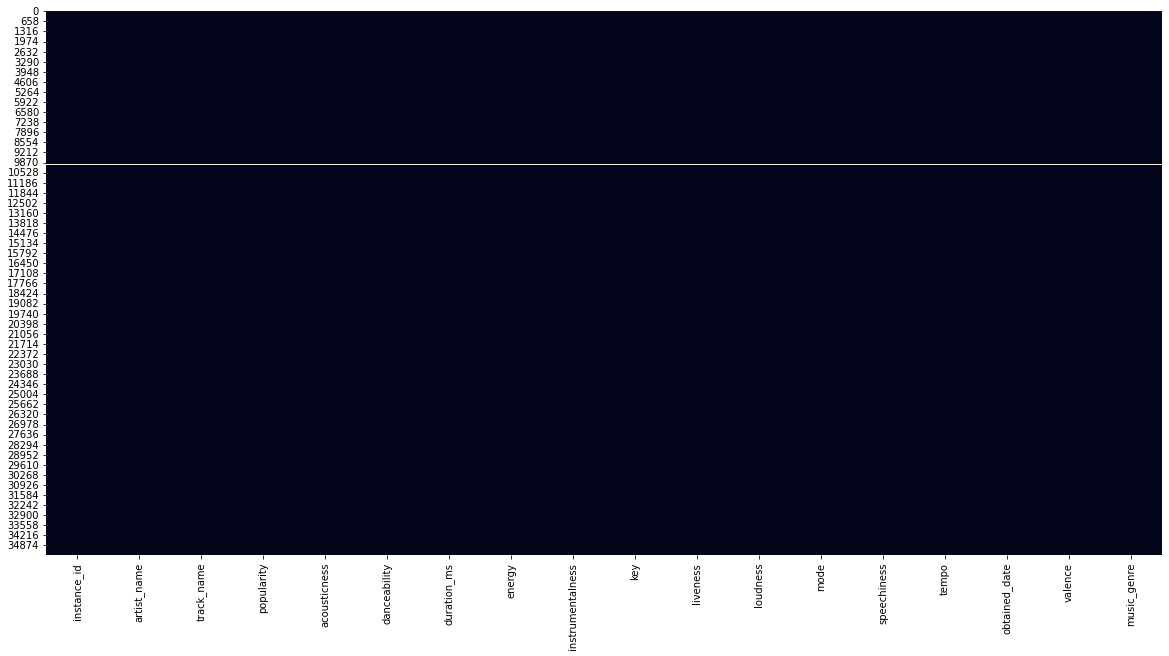

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(Data.isna(),cbar=False)

In [8]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

                  Count Missing  Percent Missing
instance_id                   5         0.014088
artist_name                   5         0.014088
track_name                    6         0.016906
popularity                    6         0.016906
acousticness                  6         0.016906
danceability                  6         0.016906
duration_ms                   6         0.016906
energy                        6         0.016906
instrumentalness              6         0.016906
key                           6         0.016906
liveness                      6         0.016906
loudness                      6         0.016906
mode                          6         0.016906
speechiness                   6         0.016906
tempo                         6         0.016906
obtained_date                 6         0.016906
valence                       6         0.016906
music_genre                   6         0.016906 



In [9]:
Data[Data.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35490,63022.0,Passi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Data=Data.dropna()

In [11]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

Empty DataFrame
Columns: [Count Missing, Percent Missing]
Index: [] 



### Exploratory Data Analysis EDA + Feature engineering

Text(0.5, 0, 'song title')

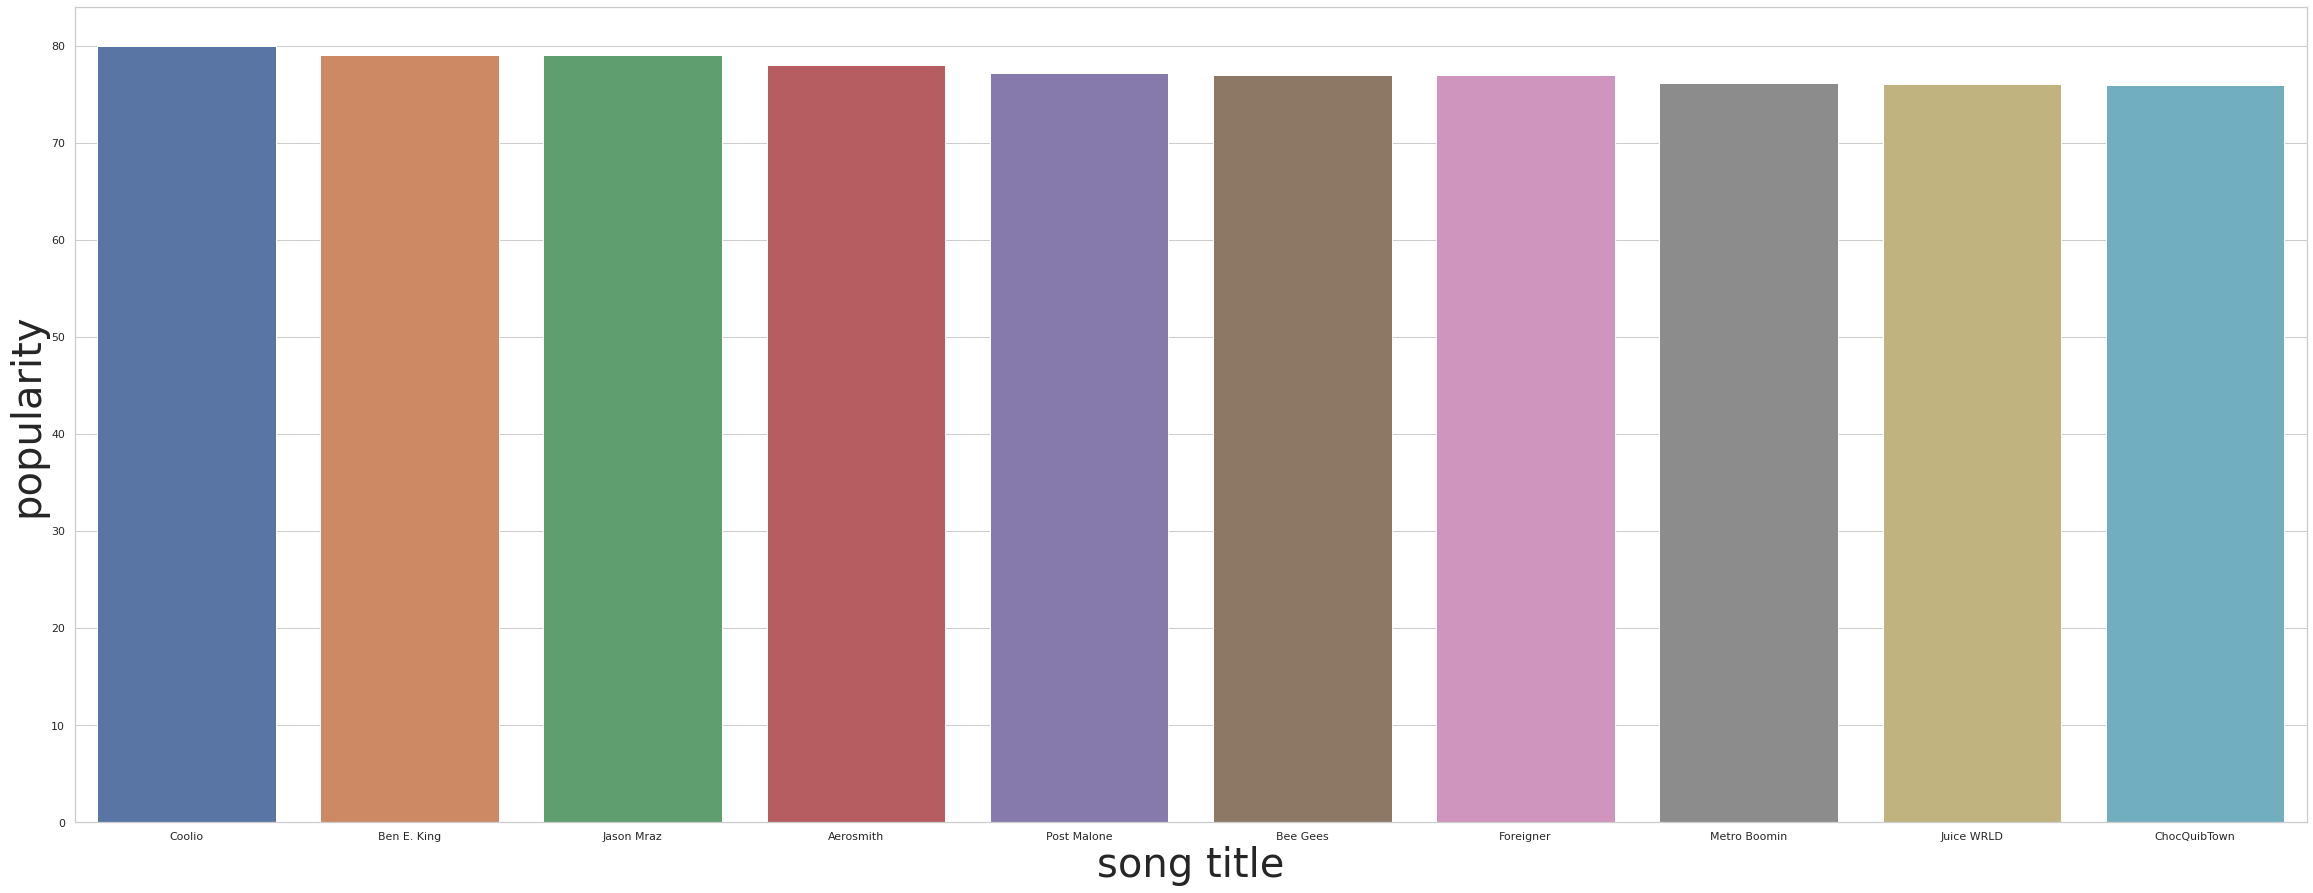

In [12]:
plt.figure(figsize=(40, 15))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = Data.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('popularity', fontsize=40)
axis.set_xlabel('song title', fontsize=40)

Text(0.5, 0, 'artist')

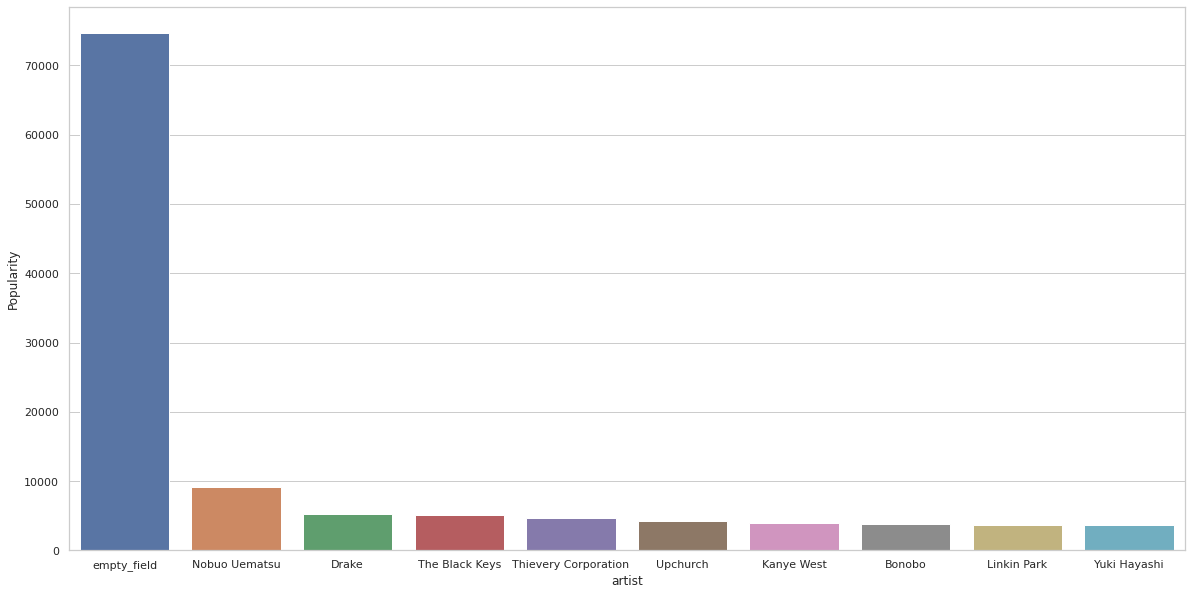

In [13]:
from collections import Counter

artist_popularity_sum = Counter()

# since a song can have different artists, we add the popularity score to each 
# artists
for l in Data[["artist_name", "popularity"]].to_numpy():
    artist_list = [x.strip() for x in l[0].split(',')]
    for artist in artist_list:
        artist_popularity_sum[artist] += float(l[1])


top_10_artist = artist_popularity_sum.most_common(10)
xs = [a[0] for a in top_10_artist]
ys = [a[1] for a in top_10_artist]

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
axis = sns.barplot(x=xs, y=ys)

axis.set_ylabel('Popularity')
axis.set_xlabel('artist')

### Relationship between energy and popularity

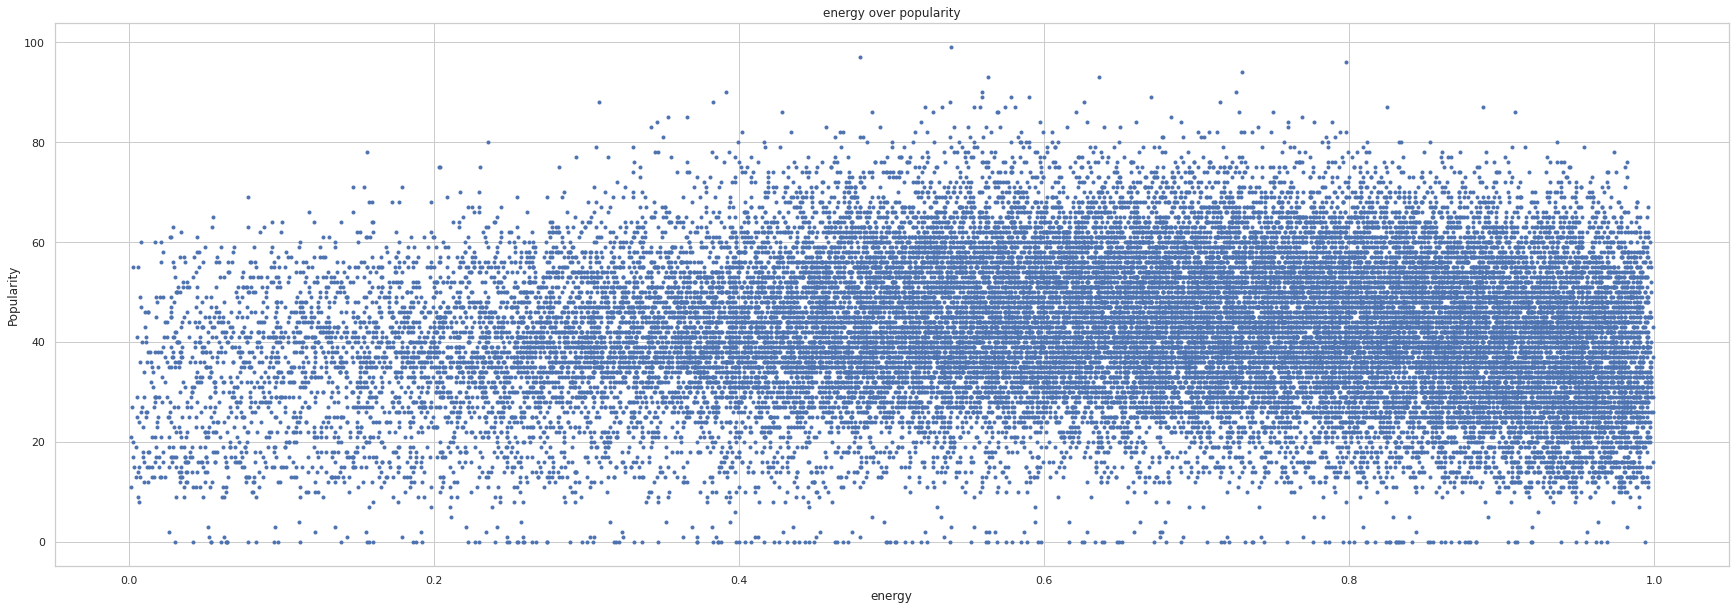

In [14]:
plt.figure(figsize=(30, 10))

xs = Data["energy"].to_numpy()
ys = Data["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('energy')
plt.title("energy over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean energy for song popularity')

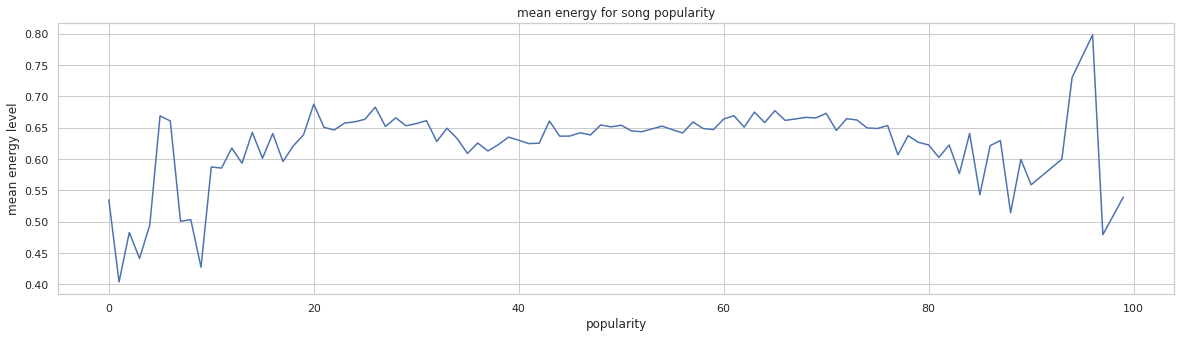

In [15]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x =   Data.groupby("popularity")["energy"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean energy level')
axis.set_xlabel('popularity')
axis.set_title("mean energy for song popularity")

### Relationship between livliness and popularity

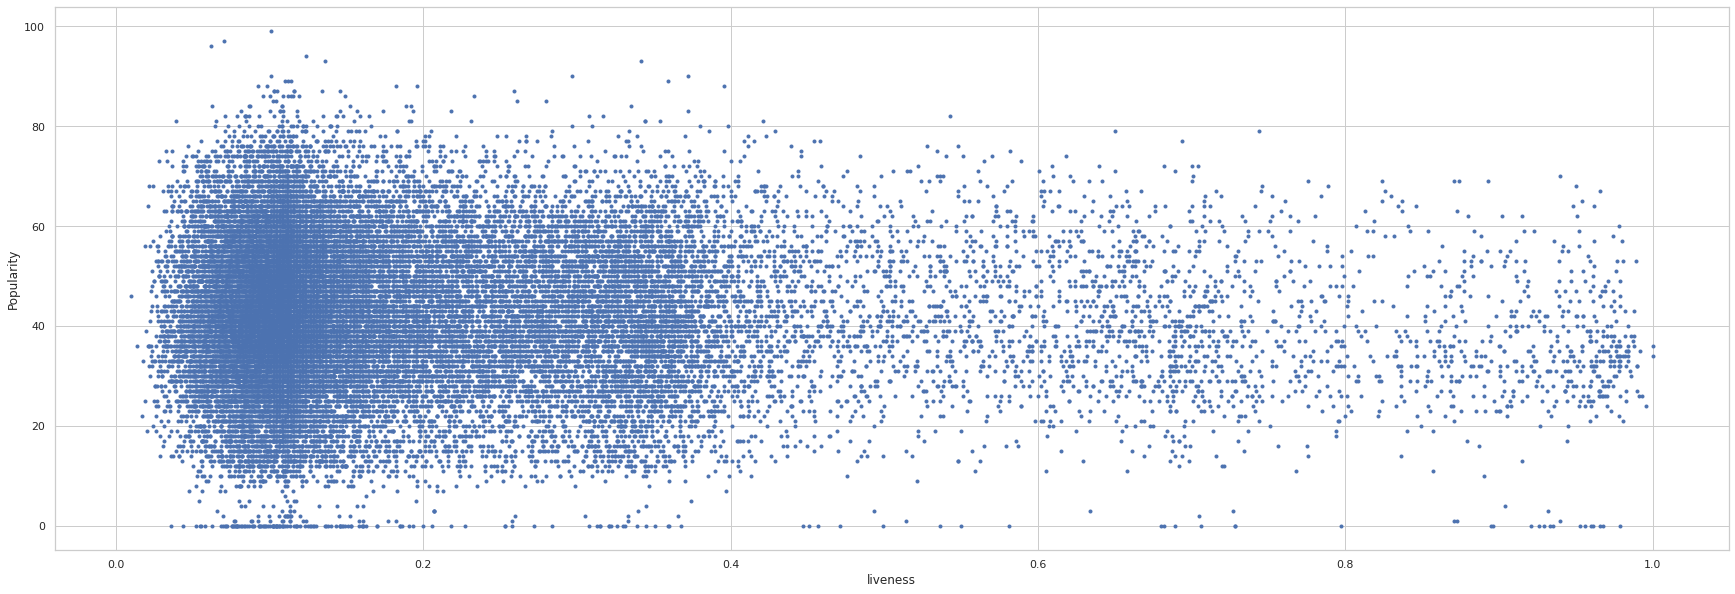

In [16]:
plt.figure(figsize=(30, 10))

xs = Data["liveness"].to_numpy()
ys = Data["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('liveness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean livness for song popularity')

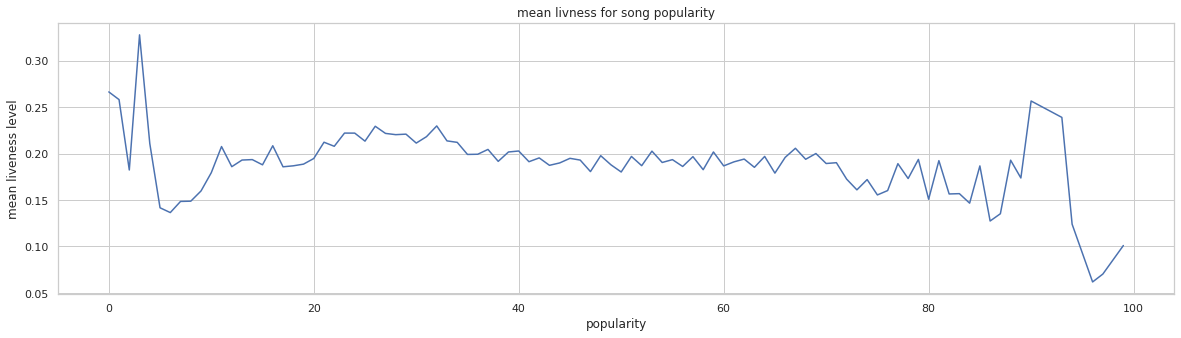

In [17]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = Data.groupby("popularity")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('popularity')
axis.set_title("mean livness for song popularity")

Text(0.5, 1.0, 'mean acousticness for song popularity')

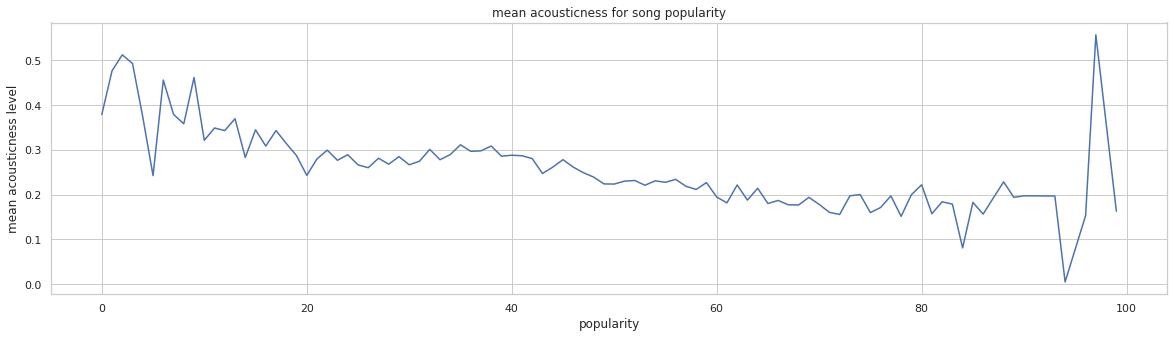

In [18]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = Data.groupby("popularity")["acousticness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('popularity')
axis.set_title("mean acousticness for song popularity")

In [19]:
Data['obtained_date'].nunique()

5

In [20]:
Data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


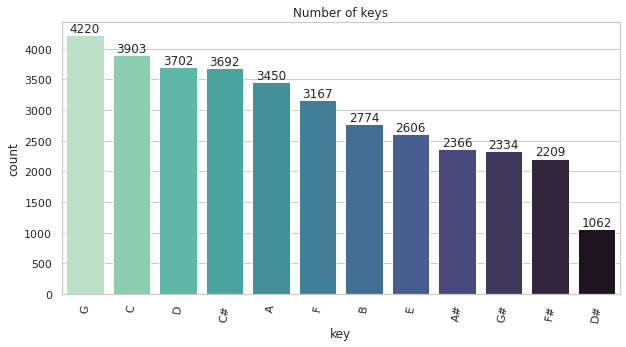

In [21]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='key', data=Data, palette='mako_r', order = Data['key'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of keys')
plt.show()

###  Variable "tempo"

In [22]:
Data["tempo"].head(15)

0                100.889
1     115.00200000000001
2                127.994
3                128.014
4                145.036
5                      ?
6                149.995
7                120.008
8     149.94799999999998
9                139.933
10                57.528
11               178.543
12               128.043
13               154.745
14               139.911
Name: tempo, dtype: object

In [23]:
Data[Data["tempo"]=="?"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
35,27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35443,79754.0,Eagles,Life in the Fast Lane - Eagles 2013 Remaster,72.0,0.09660,0.667,286220.0,0.755,0.000069,A,0.0523,-7.246,Major,0.0690,?,4-Apr,0.8830,Rock
35462,89068.0,All Time Low,Weightless,65.0,0.00282,0.497,198000.0,0.923,0.000000,D,0.1580,-4.512,Major,0.1370,?,4-Apr,0.6670,Rock
35464,33825.0,The xx,Angels,68.0,0.95000,0.424,171653.0,0.157,0.059300,A,0.1010,-18.141,Major,0.0428,?,4-Apr,0.3420,Rock
35484,71214.0,Matchbox Twenty,Bright Lights,55.0,0.01340,0.319,234427.0,0.732,0.000000,E,0.6580,-4.475,Major,0.0436,?,4-Apr,0.2000,Rock


In [24]:
pd.to_numeric(Data["tempo"], errors='coerce').mean()

121.80652101762972

In [25]:
Data["tempo"]=Data["tempo"].replace('?',pd.to_numeric(Data["tempo"], errors='coerce').mean())
Data["tempo"]=Data["tempo"].astype(float)
print(Data["tempo"])
Data.info()

0        100.889000
1        115.002000
2        127.994000
3        128.014000
4        145.036000
            ...    
35485    185.791000
35486    191.946000
35487    121.806521
35488    120.418000
35489     99.947000
Name: tempo, Length: 35485, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35485 entries, 0 to 35489
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       35485 non-null  float64
 1   artist_name       35485 non-null  object 
 2   track_name        35485 non-null  object 
 3   popularity        35485 non-null  float64
 4   acousticness      35485 non-null  float64
 5   danceability      35485 non-null  float64
 6   duration_ms       35485 non-null  float64
 7   energy            35485 non-null  float64
 8   instrumentalness  35485 non-null  float64
 9   key               35485 non-null  object 
 10  liveness          35485 non-null  float64
 11  loudness    

In [26]:
Data[Data['tempo']==119.95296059529068]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


Text(0, 0.5, 'BPM')

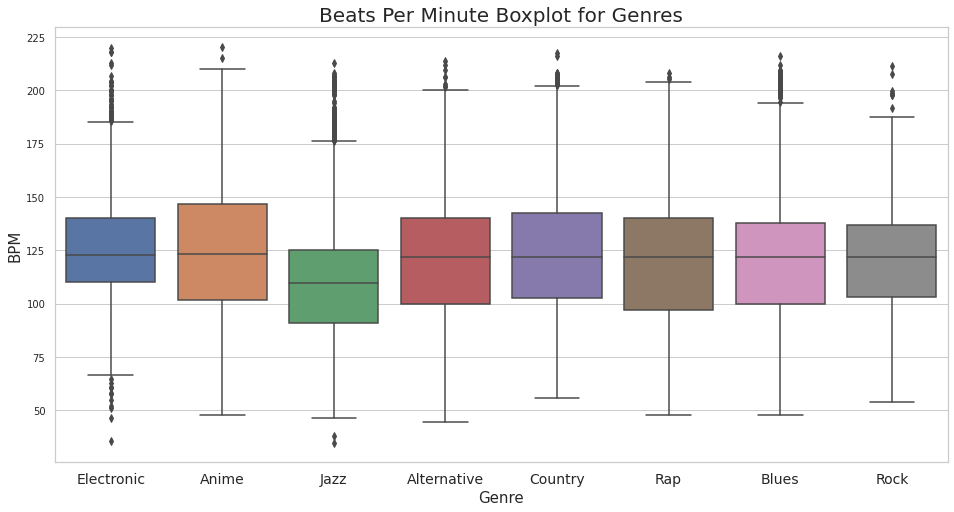

In [27]:
x = Data[["music_genre", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "music_genre", y = "tempo", data = x);

plt.title('Beats Per Minute Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
#plt.savefig("BPM_Boxplot.png")

<Axes: >

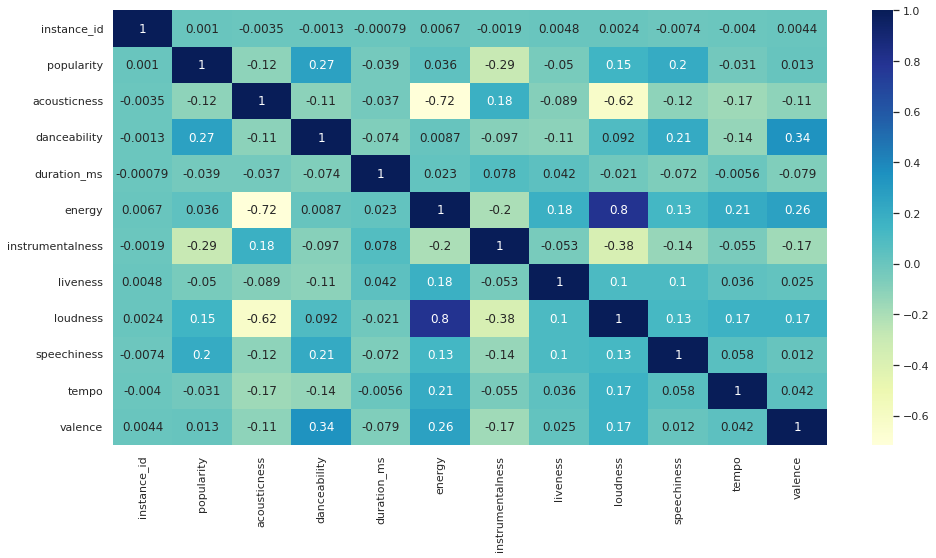

In [28]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = Data.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")


In [29]:
Data.drop("instance_id",axis=1,inplace=True)
Data.drop("artist_name",axis=1,inplace=True)
Data.drop("track_name",axis=1,inplace=True)
Data.drop("obtained_date",axis=1,inplace=True)

In [30]:
Data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889000,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002000,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994000,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014000,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036000,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35485,66.0,0.00354,0.370,178116.0,0.855,0.000000,G#,0.3720,-3.232,Minor,0.2900,185.791000,0.650,Rock
35486,55.0,0.66700,0.383,133227.0,0.454,0.001920,C,0.0852,-9.471,Minor,0.0292,191.946000,0.148,Rock
35487,62.0,0.01500,0.619,246307.0,0.637,0.000000,D,0.3740,-7.369,Major,0.0286,121.806521,0.936,Rock
35488,59.0,0.21400,0.504,180280.0,0.673,0.000002,C,0.1710,-11.834,Minor,0.0336,120.418000,0.581,Rock


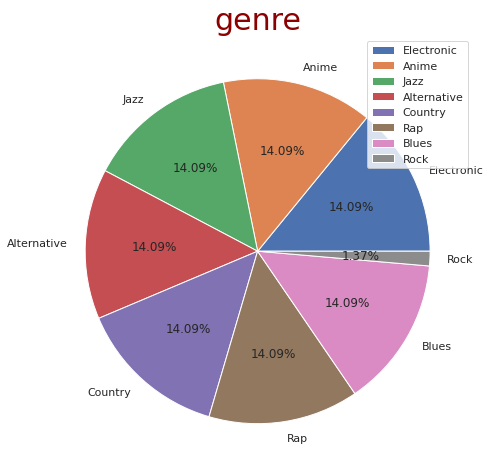

In [31]:
import seaborn as sns
genre = Data["music_genre"].value_counts()


plt.figure(figsize=(17, 17))
plt.subplot(1,2,2)
plt.pie(genre.values, labels=genre.index, autopct='%1.2f%%')
plt.title('genre',color = 'darkred',fontsize = 30)
plt.legend()
plt.show()

In [32]:
Data['is_Rock']=Data['music_genre'].apply(lambda x: 1 if x == 'Rock' or x == 'Hip-Hop' or x=='Rap'  else 0)
Data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,is_Rock
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889000,0.759,Electronic,0
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002000,0.531,Electronic,0
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994000,0.333,Electronic,0
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014000,0.270,Electronic,0
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036000,0.323,Electronic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35485,66.0,0.00354,0.370,178116.0,0.855,0.000000,G#,0.3720,-3.232,Minor,0.2900,185.791000,0.650,Rock,1
35486,55.0,0.66700,0.383,133227.0,0.454,0.001920,C,0.0852,-9.471,Minor,0.0292,191.946000,0.148,Rock,1
35487,62.0,0.01500,0.619,246307.0,0.637,0.000000,D,0.3740,-7.369,Major,0.0286,121.806521,0.936,Rock,1
35488,59.0,0.21400,0.504,180280.0,0.673,0.000002,C,0.1710,-11.834,Minor,0.0336,120.418000,0.581,Rock,1


In [33]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#']
mode----------------------------------------------['Minor' 'Major']
music_genre---------------------------------------['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock']


In [34]:
Data["mode"]=Data["mode"].replace('Major',1)
Data["mode"]=Data["mode"].replace('Minor',0)
Data["mode"]=Data["mode"].astype(int)
print(Data["mode"])
Data.info()

0        0
1        0
2        1
3        1
4        1
        ..
35485    0
35486    0
35487    1
35488    0
35489    1
Name: mode, Length: 35485, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35485 entries, 0 to 35489
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        35485 non-null  float64
 1   acousticness      35485 non-null  float64
 2   danceability      35485 non-null  float64
 3   duration_ms       35485 non-null  float64
 4   energy            35485 non-null  float64
 5   instrumentalness  35485 non-null  float64
 6   key               35485 non-null  object 
 7   liveness          35485 non-null  float64
 8   loudness          35485 non-null  float64
 9   mode              35485 non-null  int64  
 10  speechiness       35485 non-null  float64
 11  tempo             35485 non-null  float64
 12  valence           35485 non-null  float64
 13  music_genre       35

In [35]:
from sklearn.preprocessing import LabelEncoder

# assume your column of 12 objects is named 'category_column'
encoder = LabelEncoder()
Data['key'] = encoder.fit_transform(Data['key'])




In [36]:
Data.drop("music_genre",axis=1,inplace=True)

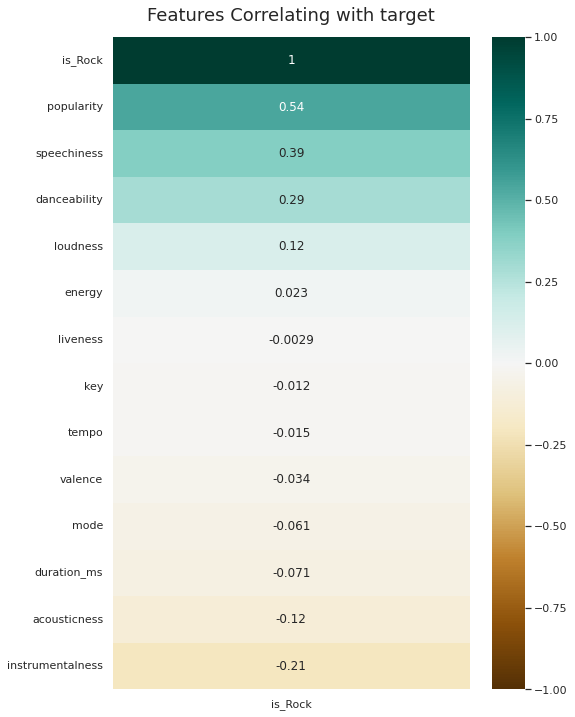

In [37]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Data.corr()[['is_Rock']].sort_values(by='is_Rock', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);

In [38]:
Y = Data['is_Rock']
X = Data.drop(columns=['is_Rock'])

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X[:]=ss.fit_transform(X)
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,-1.080013,-0.844847,0.496177,-1.852814,1.277677,2.058038,-1.258217,-0.503429,0.639755,-1.329152,-0.145048,-0.729331,1.167000
1,-0.798698,-0.818281,0.306272,0.006014,1.059831,2.574777,-0.106914,-0.449255,0.210127,-1.329152,-0.614059,-0.237253,0.212885
2,-1.009684,-0.850213,0.293612,-0.016807,0.483178,-0.493605,1.620041,2.018687,0.775968,0.752359,-0.566949,0.215739,-0.615689
3,-0.587712,-0.776212,1.268454,-0.431823,0.248246,-0.523923,-0.394739,-0.250616,0.803723,0.752359,1.573960,0.216436,-0.879326
4,-0.728369,-0.844946,0.407555,0.040722,-0.234434,2.440686,1.044389,-0.250616,0.391355,0.752359,-0.495760,0.809942,-0.657536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35485,1.662810,-0.848623,-1.288924,-0.336103,0.910328,-0.532197,1.620041,1.043549,1.099005,-1.329152,2.107879,2.230947,0.710866
35486,0.889193,1.349070,-1.206632,-0.718345,-0.802543,-0.525918,-0.682565,-0.682807,-0.356179,-1.329152,-0.622434,2.445553,-1.389861
35487,1.381495,-0.810662,0.287282,0.244560,-0.020859,-0.532197,-0.106914,1.055587,0.134091,0.752359,-0.628716,0.000000,1.907695
35488,1.170508,-0.151480,-0.440685,-0.317676,0.132915,-0.532190,-0.682565,-0.166345,-0.907325,-1.329152,-0.576371,-0.048414,0.422121


In [40]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
35485    1
35486    1
35487    1
35488    1
35489    1
Name: is_Rock, Length: 35485, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [42]:
d=0
for i in Y_train:
  if i==1:
    d=d+1
print(d)

4399


In [43]:
import imblearn
smote = imblearn.over_sampling.SMOTE(sampling_strategy=0.7)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


In [44]:
d=0
for i in Y_train:
  if i==1:
    d=d+1
print(d)

16792


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve,cross_val_score

In [46]:
def evaluation(model):
    model.fit(X_train,Y_train.values.ravel())    
    y_pred=model.predict(X_test)
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    cv_scores = cross_val_score(model,X_train, Y_train.values.ravel(),scoring='accuracy',cv=5)
    print("cross validation score=",cv_scores)
    print("ecart type cross validation=",np.std(cv_scores))
    N, train_score, val_score = learning_curve(model, X_train, Y_train.values.ravel(),
                                              cv=5, scoring='accuracy',train_sizes=np.linspace(0.1, 1,5))    
    plt.figure(figsize=(12, 8))
    plt.plot(N, 1-train_score.mean(axis=1), label='train loss')
    plt.plot(N, 1-val_score.mean(axis=1), label='validation loss')
    plt.legend()

def gridSearch(model,params):
    print("For",str(model).split("(")[0])
    grid = GridSearchCV(model, params,scoring='f1' ,cv=5)
    grid.fit(X_train,Y_train.values.ravel())
    print("\n")
    print("Best Parameters : ", grid.best_estimator_)
    print("\n")
    return(grid.best_estimator_)

In [47]:
from sklearn.linear_model import LogisticRegression
params_logistic_regression={'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 10)}
model=gridSearch(LogisticRegression(random_state=123,solver='liblinear', max_iter=5000),params_logistic_regression)

For LogisticRegression


Best Parameters :  LogisticRegression(C=0.046415888336127774, max_iter=5000, random_state=123,
                   solver='liblinear')




[[5330  681]
 [  79 1007]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      6011
           1       0.60      0.93      0.73      1086

    accuracy                           0.89      7097
   macro avg       0.79      0.91      0.83      7097
weighted avg       0.93      0.89      0.90      7097

cross validation score= [0.89064607 0.89909269 0.90448749 0.90044139 0.90215792]
ecart type cross validation= 0.004717898830069733


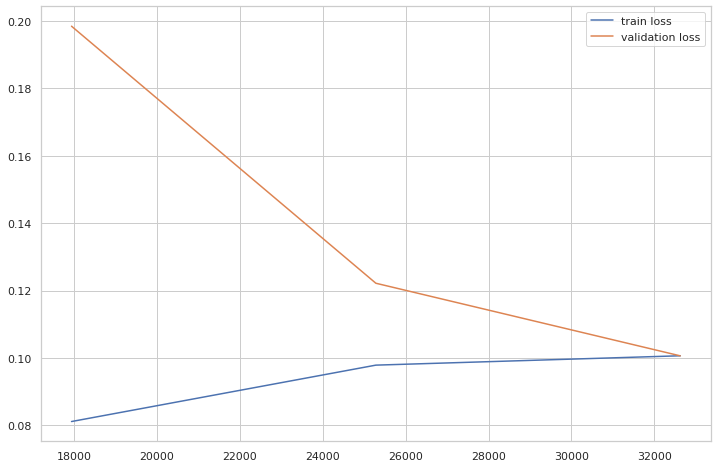

In [48]:
evaluation(LogisticRegression(C=0.000774263682681127, max_iter=5000, random_state=123,
                   solver='liblinear'))

[[5360  651]
 [  89  997]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      6011
           1       0.60      0.92      0.73      1086

    accuracy                           0.90      7097
   macro avg       0.79      0.90      0.83      7097
weighted avg       0.93      0.90      0.90      7097

cross validation score= [0.89714356 0.911231   0.92042668 0.91846493 0.92005885]
ecart type cross validation= 0.008812757424179819


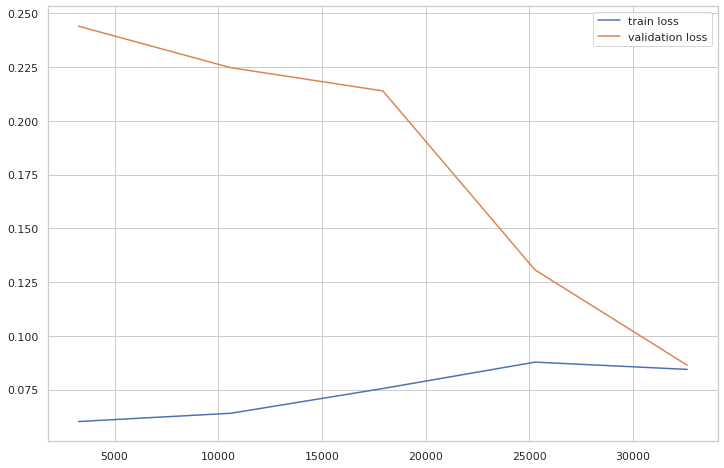

In [49]:
from sklearn.ensemble import  RandomForestClassifier
evaluation(RandomForestClassifier(max_depth = 4, min_samples_leaf=2, n_estimators=166))

[[5796  215]
 [ 576  510]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6011
           1       0.70      0.47      0.56      1086

    accuracy                           0.89      7097
   macro avg       0.81      0.72      0.75      7097
weighted avg       0.88      0.89      0.88      7097

cross validation score= [0.94924605 0.96051986 0.97376165 0.97412948 0.97523296]
ecart type cross validation= 0.010204268780780346


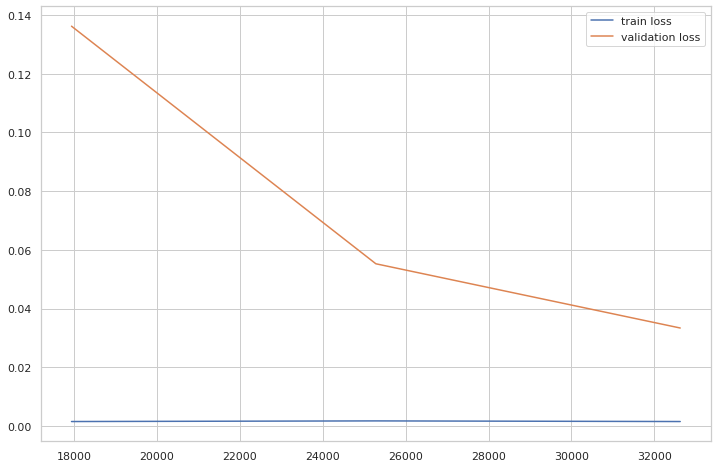

In [50]:
from sklearn.svm import SVC
evaluation(SVC(C=10, gamma=1))